# Linear Regression with Normal equation


---



> **Importing libraries**




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> **Creating normal equation algorithm**
*   Our formula for finding thetas : *θ = ( X^(t) * X )^(-1) * X^(t) * Y*    
(θ represents coefficients, X is the feature matrix, Y is the vector of target values and t is taking transpose of matrix)



In [10]:
from os import X_OK
class Linear_Regression:

  def __init__(self):

    self.slope = None
    self.intercept = None
    self.r_squared = None


  def fit(self, X, y):

    X = np.array(X)
    y = np.array(y)
    n = len(X)

    X_matrix = np.column_stack([np.ones(n), X])
    XtX = X_matrix.T @ X_matrix
    Xty = X_matrix.T @ y
    beta = np.linalg.solve(XtX,Xty)

    self.intercept = beta[0]
    self.slope = beta[1]

    y_pred = self.predict(X)
    self.r_squared = 1 - ((np.sum((y - y_pred) ** 2))/(np.sum((y - np.mean(y)) ** 2)))

  def predict(self, X):
    X = np.array(X)
    return self.slope*X + self.intercept

  def get_params(self):
    """Return fitted parameters"""
    return {
        'slope': self.slope,
        'intercept': self.intercept,
        'r_squared': self.r_squared
    }



> **Loading a dataset and visualize regression**



In [14]:
data = pd.read_csv('/content/linear_regression_data.csv')

In [15]:
model = Linear_Regression()
model.fit(data.x, data.y)

params = model.get_params()
print(f"Slope: {params['slope']}")
print(f"Intercept: {params['intercept']}")
print(f"R-squared: {params['r_squared']}")
print(f"Equation: y = {params['slope']}x + {params['intercept']}")

y_pred = model.predict(data.x)

Slope: 2.0087704293118978
Intercept: 8.933675053253756
R-squared: 0.9801281208439784
Equation: y = 2.0087704293118978x + 8.933675053253756


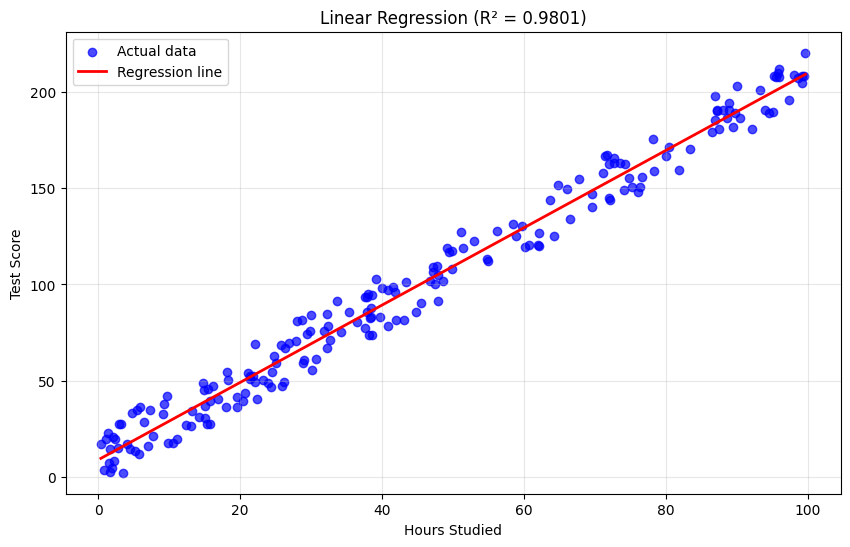

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data.x, data.y, alpha=0.7, label='Actual data', color='blue')
plt.plot(data.x, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.title(f'Linear Regression (R² = {params["r_squared"]:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



> **Comparison with Scikit-Learn**



In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sklearn_model = LinearRegression()
# Reshape data.x and data.y to be 2D arrays
sklearn_model.fit(data.x.values.reshape(-1, 1), data.y.values.reshape(-1, 1))

LinearRegression()

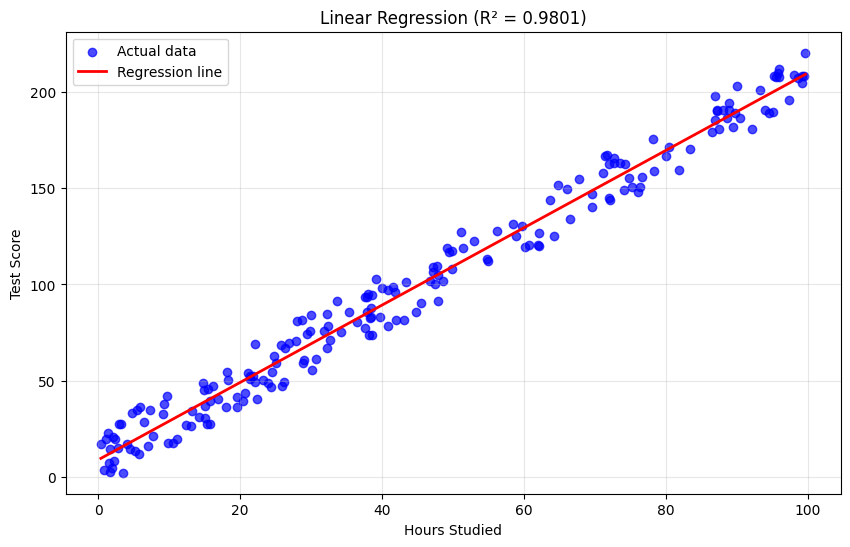

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data.x, data.y, alpha=0.7, label='Actual data', color='blue')
plt.plot(data.x, sklearn_model.predict(data.x.values.reshape(-1,1)), color='red', linewidth=2, label='Regression line')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.title(f'Linear Regression (R² = {params["r_squared"]:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
r2_score(data.y.values.reshape(-1,1),sklearn_model.predict(data.x.values.reshape(-1,1)))

0.9801281208439784